# Find poles: single channel

In [1]:
using Plots

## 1. Straightforward continuation

In [2]:
function amp(s)
    m = 2.5;
    g = 1.1;
    K = g^2/(m^2 - s)
    ρ = sqrt(1.-1 ./s);
    #
    K/(1-1.0im*ρ*K)
end

amp (generic function with 1 method)

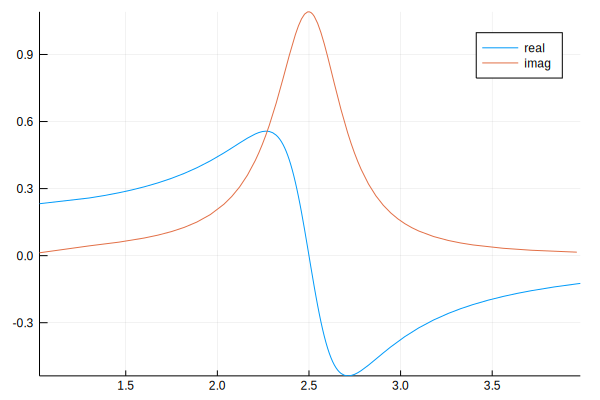

In [3]:
plot(e->real(amp(e^2)), 1, 4, lab="real")
plot!(e->imag(amp(e^2)), 1, 4, lab="imag")

### Plot the second sheet
Actually, in this case everything is at the first sheet

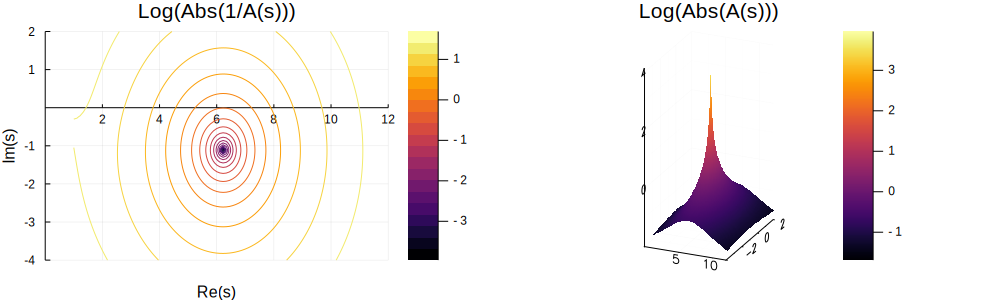

In [19]:
let sxv = linspace(1, 12,100), syv = linspace(-4.0,2, 100)
    cal = [amp(sx+1im*sy) for sy in syv, sx in sxv]
    plot(size=(1000,300),
        contour(sxv, syv, [log(abs(1/v)) for v in cal], levels=20, framestyle=:origin, title="Log(Abs(1/A(s)))",
            xlab="Re(s)", ylab="Im(s)"),
        surface(sxv, syv, [log(abs(v)) for v in cal], levels=20, framestyle=:origin, title="Log(Abs(A(s)))")
        )
end

## 2. Make correct sheet structure

In [5]:
function ampC(s)
    m = 2.5;
    g = 1.1;
    K = g^2/(m^2 - s)
    iρ = -sqrt(1.0/s-1);
    #
    K/(1-iρ*K)
end
# for the real value - take it above
ampC(s::Float64) = amp(s+1e-5im)
# second sheet
function ampCII(s)
    iρ = -sqrt(1.0/s-1);
    inv_ampI = 1.0/ampC(s)
    inv_ampII = inv_ampI+2iρ
    1.0/inv_ampII
end

ampCII (generic function with 1 method)

### Plot amplitude in different sheets

#### Now, the first sheet does not have any poles
Imaginary part is discontinues

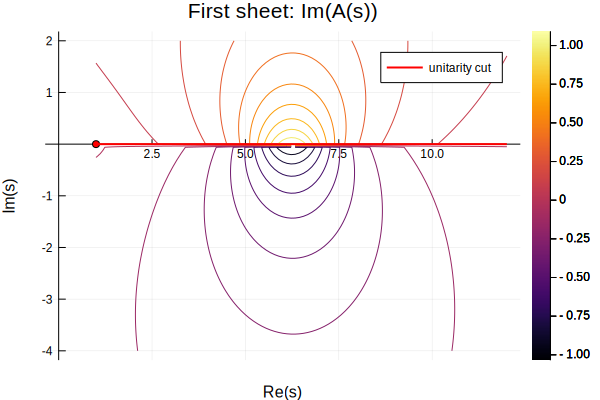

In [18]:
let sxv = linspace(1, 12,100), syv = linspace(-4.0,2, 100)
    cal = [ampC(sx+1im*sy) for sy in syv, sx in sxv]
    contour(sxv, syv, [imag(v) for v in cal], levels=20, framestyle=:origin, title="First sheet: Im(A(s))",
            xlab="Re(s)", ylab="Im(s)");
    scatter!([1],[0],m=(4,:c,:red),lab="")
    plot!([1,12],[0,0],line=(2,:red), lab="unitarity cut")
end

#### The second sheet has the pole and reflection
It is easier to see poles in log scale

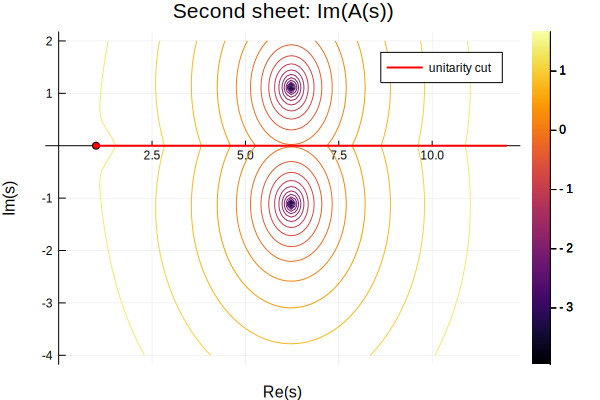

In [20]:
let sxv = linspace(1, 12,100), syv = linspace(-4.0,2, 100)
    cal = [ampCII(sx+1im*sy) for sy in syv, sx in sxv]
    contour(sxv, syv, [log(abs(1/v)) for v in cal], levels=20, framestyle=:origin, title="Second sheet: Im(A(s))",
            xlab="Re(s)", ylab="Im(s)")
    scatter!([1],[0],m=(4,:c,:red),lab="")
    plot!([1,12],[0,0],line=(2,:red), lab="unitarity cut")
end

## 3. Chew-Mandelstam function
$$
\text{CM}(s) = \frac{s}{\pi}\int_\text{th}^\infty \frac{\rho(s')}{s'(s'-s-i0)}
$$

In [9]:
using QuadGK
function CM(s)
    th = 1;
    ρ(s) = sqrt(1.-1.0/s);
    function integrand(θ)
        sp = th+tan(θ)
        ρ(sp)/(sp*(sp-s-1e-6im))/cos(θ)^2
    end
    s/π*complex(quadgk(integrand,0,π/2)[1]...)
end

CM (generic function with 1 method)

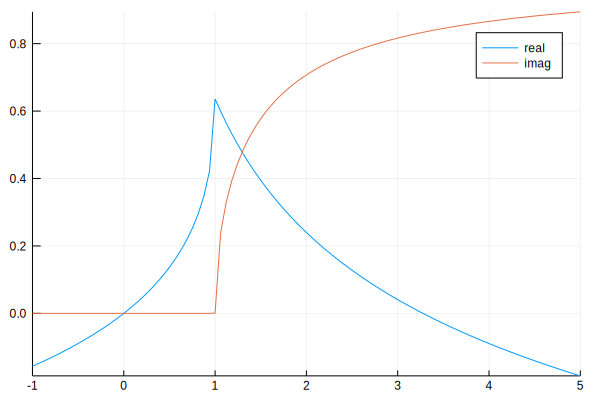

In [39]:
let sv = linspace(-1,5,100)
    cal = [CM(s) for s in sv]
    plot(sv, real(cal), lab = "real")
    plot!(sv, imag(cal), lab = "imag")
end

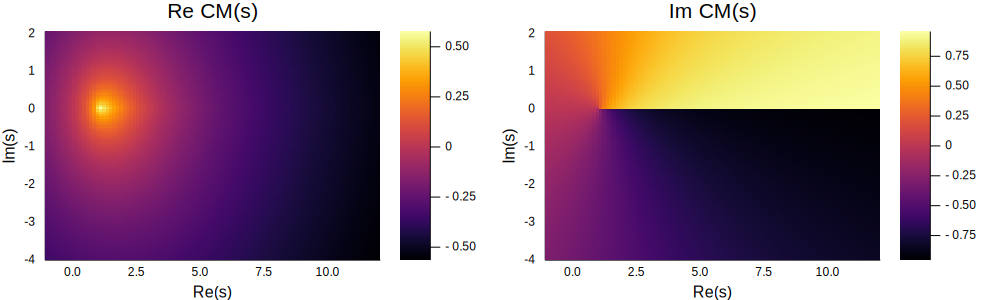

In [40]:
let sxv = linspace(-1, 12,100), syv = linspace(-4.0,2, 100)
    cal = [CM(sx+1im*sy) for sy in syv, sx in sxv]
    plot(size=(1000,300),
        heatmap(sxv, syv, real(cal), levels=20, xlab="Re(s)", ylab="Im(s)", title="Re CM(s)"),
        heatmap(sxv, syv, imag(cal), levels=20, xlab="Re(s)", ylab="Im(s)", title="Im CM(s)")
    );
end

In equations for the amplitude, it replaces $i\rho$: $i\rho(s)\to \textrm{CM}(s)$

In [36]:
function ampCM(s)
    m = 2.5;
    g = 1.1;
    K = g^2/(m^2 - s)
    iρ = CM(s);
    #
    K/(1-iρ*K)
end
# for the real value - take it above
ampCM(s::Float64) = amp(s+1e-5im)
# second sheet
function ampCMII(s)
    iρ = -sqrt(1.0/s-1);
    inv_ampI = 1.0/ampC(s)
    inv_ampII = inv_ampI+2iρ
    1.0/inv_ampII
end

ampCMII (generic function with 1 method)

### Plot amplitude in different sheets

#### Now, the first sheet does not have any poles
Imaginary part is discontinues

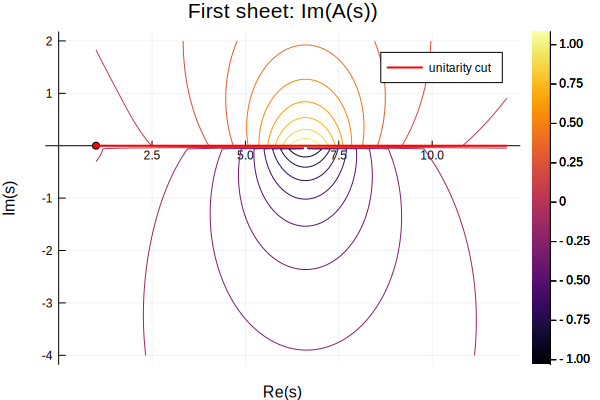

In [37]:
let sxv = linspace(1, 12,100), syv = linspace(-4.0,2, 100)
    cal = [ampCM(sx+1im*sy) for sy in syv, sx in sxv]
    contour(sxv, syv, [imag(v) for v in cal], levels=20, framestyle=:origin, title="First sheet: Im(A(s))",
            xlab="Re(s)", ylab="Im(s)");
    scatter!([1],[0],m=(4,:c,:red),lab="")
    plot!([1,12],[0,0],line=(2,:red), lab="unitarity cut")
end

#### The second sheet has the pole and reflection
It is easier to see poles in log scale

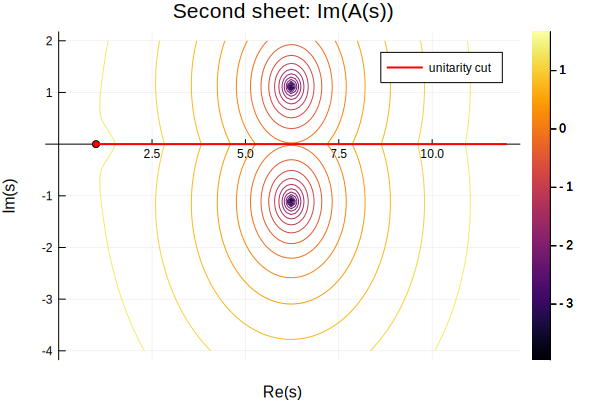

In [38]:
let sxv = linspace(1, 12,100), syv = linspace(-4.0,2, 100)
    cal = [ampCMII(sx+1im*sy) for sy in syv, sx in sxv]
    contour(sxv, syv, [log(abs(1/v)) for v in cal], levels=20, framestyle=:origin, title="Second sheet: Im(A(s))",
            xlab="Re(s)", ylab="Im(s)")
    scatter!([1],[0],m=(4,:c,:red),lab="")
    plot!([1,12],[0,0],line=(2,:red), lab="unitarity cut")
end